In [4]:
#matplotlib widget
%matplotlib notebook

In [5]:
import numpy as np
import pyvista as pv
import pandas as pd
import time

import matplotlib.pyplot as plt

In [11]:
# # Parcellizzazione
# https://www.sciencedirect.com/science/article/pii/S2211124720314601?via%3Dihub
df = pd.read_csv('Centroid_coordinates/Schaefer2018_1000Parcels_17Networks_order_FSLMNI152_2mm.Centroid_RAS.csv')
df.head()
X = df['R'].values
Y = df['A'].values
Z = df['S'].values
N=len(X)
point_cloud = np.float64([X,Y,Z]).T
point_cloud = point_cloud/point_cloud.max()
#point_cloud[:100,:]

In [14]:
runs = 40

strngTemp = '-autapse'

df = pd.read_csv('data/lamdaValues'+strngTemp+'.csv')
print('read lamdaValues'+strngTemp+'.csv')

#dfN = df[df['N']==N]
lambdas = np.unique(df['lambdas'].values)
#lambdas = np.unique(df['lambdas'].values)
print('lambdas',len(lambdas))
print(lambdas)

print(1/lambdas)

strngTemp = '-autapse'
df3 = pd.read_csv('data/SRuns'+strngTemp+'.csv')
print('read SRuns'+strngTemp+'.csv',df3.shape)

states = np.zeros((len(lambdas),runs,N))
SName = list(df3.columns)#[1:]

t0 = time.time()
for lindx,lambd in enumerate(lambdas):
    print(lindx,lambd,1./lambd)
    #print(BdName[40*lindx:40*(lindx+1)])
    cols = SName[runs*lindx:runs*(lindx+1)]
    states[lindx,:,:] = df3[cols].values.T
print(states.shape)
t1 = time.time()
print('load states time ',t1-t0)

read lamdaValues-autapse.csv
lambdas 17
[0.1  0.11 0.12 0.13 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23
 0.24 0.25 0.26]
[10.          9.09090909  8.33333333  7.69230769  7.14285714  6.66666667
  6.25        5.88235294  5.55555556  5.26315789  5.          4.76190476
  4.54545455  4.34782609  4.16666667  4.          3.84615385]
read SRuns-autapse.csv (1000, 680)
0 0.1 10.0
1 0.11 9.090909090909092
2 0.12 8.333333333333334
3 0.13 7.692307692307692
4 0.1399999999999999 7.142857142857148
5 0.1499999999999999 6.6666666666666705
6 0.1599999999999999 6.250000000000004
7 0.1699999999999999 5.882352941176474
8 0.1799999999999999 5.555555555555558
9 0.1899999999999999 5.263157894736845
10 0.1999999999999999 5.000000000000003
11 0.2099999999999999 4.761904761904764
12 0.2199999999999999 4.545454545454548
13 0.2299999999999999 4.347826086956523
14 0.2399999999999999 4.166666666666668
15 0.2499999999999999 4.000000000000002
16 0.2599999999999999 3.8461538461538476
(17, 40, 1000)
load states 

Widget(value='<iframe src="http://localhost:65089/index.html?ui=P_0x224d76dcbd0_0&reconnect=auto" class="pyvis…

brainDelta4.000000000000002.glb


<IPython.core.display.Javascript object>


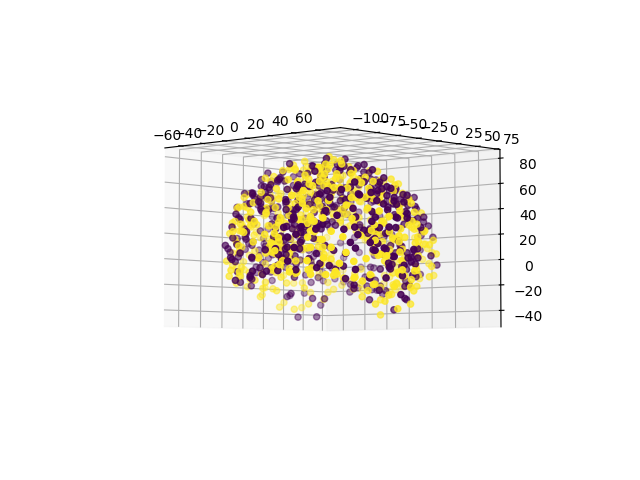

In [15]:
indx = 15
nRep = 2
pdata = pv.PolyData(point_cloud)
pdata['orig_sphere'] = np.float64(states[indx,nRep,:])#np.random.random(N)
sphere = pv.Sphere(radius=0.03)
pc = pdata.glyph(scale=False, geom=sphere, orient=False)
pl = pv.Plotter()
_ = pl.add_mesh(
    pc,
    cmap='reds',
    smooth_shading=True,
    show_scalar_bar=False,
)
pl.export_gltf('brainDelta'+ str(1/lambdas[indx] )+'.glb',inline_data=True)  
pl.show()
print('brainDelta'+ str(1/lambdas[indx] )+'.glb')

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X,Y,Z,c=states[indx,nRep,:])

Widget(value='<iframe src="http://localhost:65089/index.html?ui=P_0x224d5284e90_1&reconnect=auto" class="pyvis…

brainDelta5.882352941176474.glb


<IPython.core.display.Javascript object>


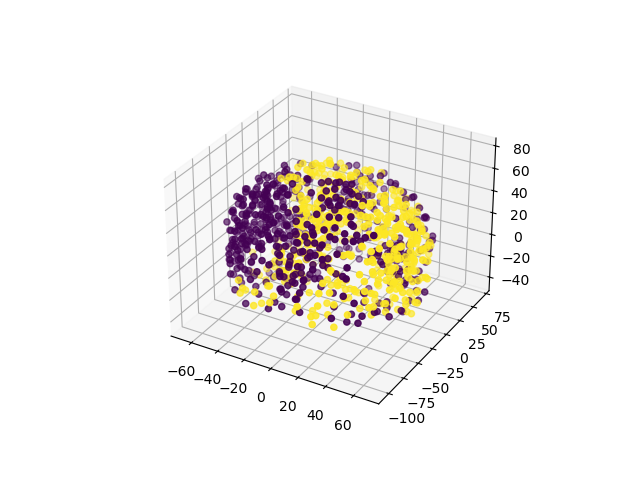

In [16]:
indx = 7
nRep = 1
pdata = pv.PolyData(point_cloud)
pdata['orig_sphere'] = np.float64(states[indx,nRep,:])#np.random.random(N)
sphere = pv.Sphere(radius=0.03)
pc = pdata.glyph(scale=False, geom=sphere, orient=False)
pl = pv.Plotter()
_ = pl.add_mesh(
    pc,
    cmap='reds',
    smooth_shading=True,
    show_scalar_bar=False,
)
pl.export_gltf('brainDelta'+ str(1/lambdas[indx] )+'.glb',inline_data=True)  
pl.show()
print('brainDelta'+ str(1/lambdas[indx] )+'.glb')

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X,Y,Z,c=states[indx,nRep,:])

Widget(value='<iframe src="http://localhost:65089/index.html?ui=P_0x2248378ec10_2&reconnect=auto" class="pyvis…

brainDelta6.6666666666666705.glb


<IPython.core.display.Javascript object>


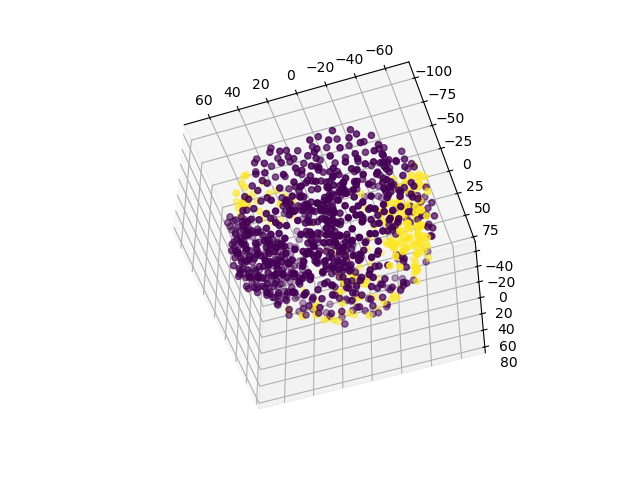

In [17]:
indx = 5
nRep = 2
pdata = pv.PolyData(point_cloud)
pdata['orig_sphere'] = np.float64(states[indx,nRep,:])#np.random.random(N)
sphere = pv.Sphere(radius=0.03)
pc = pdata.glyph(scale=False, geom=sphere, orient=False)
pl = pv.Plotter()
_ = pl.add_mesh(
    pc,
    cmap='reds',
    smooth_shading=True,
    show_scalar_bar=False,
)
pl.export_gltf('brainDelta'+ str(1/lambdas[indx] )+'.glb',inline_data=True)
pl.show()
print('brainDelta'+ str(1/lambdas[indx] )+'.glb')

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X,Y,Z,c=states[indx,nRep,:])

In [28]:
1/lambdas[15]

4.000000000000002

In [7]:
?pl.export_gltf